#                          <center> <div color = "blue">INTELLIGENCE ARTIFICIELLE</div> <br /><br /> PROJET IA for HumanForYou
</center>        





###                             <center> CESICDP GROUPE 2 </center>

#####  <center> Adrian SALAUM <br /><br /> Coralistone METSA<br /><br /> Romain COTTINEAU  <br /><br />Simon BRIFFAUD <br /><br /> </center>


##### ########################################################################################################################

##### ########################################################################################################################

##                     <center> <br />  I. RAPPEL DU CONTEXTE </center>                                                     

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

##               <center>  <br /> <br /> II. Pre-traitement des données et analyse exploratoire </center>   

##  <center>  <br /> <br /> 1. Data wrangling </center>
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

### Ca c'est avant de charger les données.

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url)
        if df.keys()[0] != "EmployeeID":
            df.rename({df.keys()[0]:"EmployeeID"}, axis='columns', errors="raise", inplace=True)
        df.set_index("EmployeeID", inplace=True)
        dataframes[file_name] = df
    
    return dataframes

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### On vérifie si les données sont correctement chargées

In [3]:
data = load_project_data()

In [4]:
general_df = pd.concat(data.values(), axis=1)
general_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [5]:
def renameColumnsWithSameName(df):
    cols=pd.Series(df.columns)
    for dup in df.columns[df.columns.duplicated(keep=False)]: 
        cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                         if d_idx != 0 
                                         else dup 
                                         for d_idx in range(df.columns.get_loc(dup).sum())]
                                        )
    df.columns=cols

In [6]:
renameColumnsWithSameName(general_df)
general_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


#### On affiche la description des colonnes pour chaque jeu de données

On visualise ainsi quelles colonnes ont déjà des valeurs numériques ou non.

On voit aussi les colonnes dans lesquelles il manque des données.

In [7]:
general_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,...,2015-01-26.1,2015-03-05.1,2015-05-01.1,2015-07-17.1,2015-09-17.1,2015-10-02.1,2015-11-09.1,2015-11-10.1,2015-11-11.1,2015-12-25.1
count,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### On encode les colonnes non-numériques

On encode les chaînes de caractères récurrentes en associant chaque chaîne à un nombre.
On encode les dates en les convertissant en secondes.

In [8]:
df_non_ethical = general_df.copy()
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [9]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype

def encodeNonNumericColumns(df):
    fields_encoded = {}

    for column in df.columns:
        if column[:4] != "2015" and not is_numeric_dtype(df[column]):
            field = df[[column]]
            ordinal_encoder = OrdinalEncoder()
            field_encoded = ordinal_encoder.fit_transform(field)
            fields_encoded[column] = field_encoded

    for key in fields_encoded.keys():
        df[key] = fields_encoded[key]

In [10]:
encodeNonNumericColumns(df_non_ethical)
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-25.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [11]:
df_non_ethical.dropna(how='all', axis=1, inplace=True)
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,2015-12-17.1,2015-12-18.1,2015-12-21.1,2015-12-22.1,2015-12-23.1,2015-12-24.1,2015-12-28.1,2015-12-29.1,2015-12-30.1,2015-12-31.1
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [12]:
# transforme dates dans df['out_time'] et df['in_time'] en numérique
from datetime import datetime

def transformDateToNumeric(df):
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            df[column] = df[column].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() if not pd.isna(x) else x)

# remmetre les colonnes date numérique en date
def transformNumericToDate(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if is_numeric_dtype(table[column]):
            df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.fromtimestamp(x) if not pd.isna(x) else x)

In [13]:
from datetime import datetime, timedelta

def getWorkingHoursPerEmployee(df):
    columns = [col for col in df.columns if col[:4] == "2015"]
    starts = columns[:int(len(columns)/2)]
    ends = columns[int(len(columns)/2):]
    
    working_hours_per_employee = dict()
    
    for index in df.index:
        working_hours_per_employee[index] = dict()
        for i in range(len(starts)):
            if type(df[starts[i]][index]) != float:
                start_date = datetime.strptime(df[starts[i]][index], '%Y-%m-%d %H:%M:%S')
                end_date = datetime.strptime(df[ends[i]][index], '%Y-%m-%d %H:%M:%S')
                delta = end_date - start_date
                value = delta.total_seconds()
            else:
                value = 0
            working_hours_per_employee[index][starts[i]] = value/3600
    
    average_hours_per_eployee = dict()
    
    for employee in working_hours_per_employee.keys():
        total_time = 0
        for time in working_hours_per_employee[employee].values():
            total_time += time
        average_time = total_time/len(working_hours_per_employee[employee])
        average_hours_per_eployee[employee] = average_time
    
    return average_hours_per_eployee

def fillAverageWorkingTime(df):
    average_hours_per_employee = getWorkingHoursPerEmployee(df)
    
    df["AverageTimeWorkedInTheYear"] = average_hours_per_employee.values()

In [14]:
fillAverageWorkingTime(df_non_ethical)

In [15]:
df_non_ethical = df_non_ethical[df_non_ethical.columns.drop(list(df_non_ethical.filter(regex='2015-')))]
df_non_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,8,0,1.0,6,1,0,0,3,3,6.870229
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,8,1,6.0,3,5,1,4,2,4,7.315971
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,8,3,5.0,2,5,0,3,3,3,6.816081
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,8,3,13.0,5,8,7,5,2,3,6.789215
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,8,2,9.0,2,6,0,4,3,3,7.877561


#### On supprime des colonnes jugées inutiles pour créer un nouveau Dataframe plus éthique

In [16]:
def dropColumns(df, columns_to_drop=""):
    for column in columns_to_drop:
        df.drop([column], axis=1, inplace=True)

In [17]:
df_ethical = df_non_ethical.copy()

columns_to_drop = [
    "MaritalStatus",
    "Over18",
    "StandardHours",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "Gender"
]

dropColumns(df_ethical, columns_to_drop=columns_to_drop)
df_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,2.0,51,0.0,2.0,2.0,6,2,1.0,...,131160,1.0,11,1.0,1,0,0,3,3,6.870229
2,3.0,2.0,4.0,31,1.0,1.0,1.0,10,1,1.0,...,41890,0.0,23,6.0,5,1,4,2,4,7.315971
3,2.0,2.0,1.0,32,0.0,1.0,1.0,17,4,4.0,...,193280,1.0,15,5.0,5,0,3,3,3,6.816081
4,4.0,4.0,3.0,38,0.0,0.0,1.0,2,5,1.0,...,83210,3.0,11,13.0,8,7,5,2,3,6.789215
5,4.0,1.0,3.0,32,0.0,2.0,1.0,10,1,3.0,...,23420,4.0,12,9.0,6,0,4,3,3,7.877561


#### On met toutes les valeurs numériques à la même échelle

In [18]:
from sklearn.preprocessing import MinMaxScaler

def normalizeColumns(df):
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            scaler = MinMaxScaler()
            df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

In [19]:
normalizeColumns(df_ethical)
df_ethical.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.666667,1.000000,0.333333,0.785714,0.0,1.0,1.0,0.178571,0.25,0.2,...,0.637546,0.111111,0.000000,0.025,0.025,0.000000,0.000000,0.666667,0.0,0.263270
2,0.666667,0.333333,1.000000,0.309524,1.0,0.5,0.5,0.321429,0.00,0.2,...,0.167457,0.000000,0.857143,0.150,0.125,0.066667,0.235294,0.333333,1.0,0.344014
3,0.333333,0.333333,0.000000,0.333333,0.0,0.5,0.5,0.571429,0.75,0.8,...,0.964666,0.111111,0.285714,0.125,0.125,0.000000,0.176471,0.666667,0.0,0.253461
4,1.000000,1.000000,0.666667,0.476190,0.0,0.0,0.5,0.035714,1.00,0.2,...,0.385045,0.333333,0.000000,0.325,0.200,0.466667,0.294118,0.333333,0.0,0.248594
5,1.000000,0.000000,0.666667,0.333333,0.0,1.0,0.5,0.321429,0.00,0.6,...,0.070195,0.444444,0.071429,0.225,0.150,0.000000,0.235294,0.666667,0.0,0.445745


In [20]:
df_ethical.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.574534,0.576082,0.587145,0.450567,0.161224,0.803741,0.630272,0.292590,0.478231,0.449524,...,0.289307,0.299426,0.300680,0.281998,0.175204,0.145850,0.242537,0.576644,0.153741,0.343723
std,0.364252,0.367084,0.235415,0.217460,0.367780,0.332652,0.263836,0.289465,0.255983,0.266213,...,0.247861,0.277654,0.261365,0.194556,0.153128,0.214780,0.209843,0.237133,0.360742,0.241065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.285714,0.000000,0.500000,0.500000,0.035714,0.250000,0.200000,...,0.100158,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.156244
50%,0.666667,0.666667,0.666667,0.428571,0.000000,1.000000,0.500000,0.214286,0.500000,0.400000,...,0.205898,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.288801
75%,1.000000,1.000000,0.666667,0.595238,0.000000,1.000000,1.000000,0.464286,0.750000,0.600000,...,0.388152,0.444444,0.500000,0.375000,0.225000,0.200000,0.411765,0.666667,0.000000,0.449952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
def fillNaValuesWithColumnMean(df):
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())

In [22]:
fillNaValuesWithColumnMean(df_ethical)
df_ethical.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.574534,0.576082,0.587145,0.450567,0.161224,0.803741,0.630272,0.292590,0.478231,0.449524,...,0.289307,0.299426,0.300680,0.281998,0.175204,0.145850,0.242537,0.576644,0.153741,0.343723
std,0.363218,0.366251,0.234398,0.217460,0.367780,0.332652,0.263836,0.289465,0.255983,0.266213,...,0.247861,0.277055,0.261365,0.194357,0.153128,0.214780,0.209843,0.237133,0.360742,0.241065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.285714,0.000000,0.500000,0.500000,0.035714,0.250000,0.200000,...,0.100158,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.156244
50%,0.666667,0.666667,0.666667,0.428571,0.000000,1.000000,0.500000,0.214286,0.500000,0.400000,...,0.205898,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.288801
75%,1.000000,1.000000,0.666667,0.595238,0.000000,1.000000,1.000000,0.464286,0.750000,0.600000,...,0.388152,0.444444,0.500000,0.375000,0.225000,0.200000,0.411765,0.666667,0.000000,0.449952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Pipeline

In [23]:
# def createPipeline(df):
#     df_pipeline = df.copy()
#     for table_name in df_pipeline.columns.get_level_values(0).unique():
#         if "time" in table_name:
#             transformDateToNumeric(df, table_name)
#             dropColumns(df_pipeline, table_name)
#             fillEmptyValues(df_pipeline, table_name)
#         elif table_name == "general_data":
#             columns_to_drop = [
#                 "MaritalStatus",
#                 "Over18",
#                 "StandardHours",
#                 "StockOptionLevel",
#                 "TrainingTimesLastYear",
#                 "Gender"
#             ]
            
#             encodeNonNumericColumns(df_pipeline, table_name)
#             dropColumns(df_pipeline, table_name, columns_to_drop)
#             fillEmptyValues(df_pipeline, table_name)
#     return df_pipeline

# df_prepared = createPipeline(general_df)

##               <center>  <br /> <br />  2. Régression </center>   

In [24]:
import numpy as np
from numpy import random

def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df_ethical, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [25]:
df_prepared = train_set.copy()
df_prepared.drop("Attrition", axis=1, inplace=True)
df_labels = train_set["Attrition"].copy()

df_prepared.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.0,...,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,0.569352,0.577142,0.588798,0.451200,0.805272,0.627409,0.292547,0.475978,0.448356,0.0,...,0.291224,0.299050,0.299441,0.281987,0.175291,0.145181,0.242780,0.576247,0.153628,0.344904
std,0.364426,0.364201,0.236282,0.218137,0.330271,0.264623,0.289061,0.255588,0.264972,0.0,...,0.249880,0.276412,0.261764,0.195696,0.154276,0.213000,0.209987,0.238222,0.360643,0.240847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.285714,0.500000,0.500000,0.035714,0.250000,0.200000,0.0,...,0.101790,0.111111,0.071429,0.150000,0.075000,0.000000,0.117647,0.333333,0.000000,0.157320
50%,0.666667,0.666667,0.666667,0.428571,1.000000,0.500000,0.214286,0.500000,0.400000,0.0,...,0.206635,0.222222,0.214286,0.250000,0.125000,0.066667,0.176471,0.666667,0.000000,0.290700
75%,1.000000,1.000000,0.666667,0.595238,1.000000,1.000000,0.464286,0.750000,0.600000,0.0,...,0.387994,0.444444,0.500000,0.375000,0.225000,0.200000,0.411765,0.666667,0.000000,0.457119
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regressor

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [27]:
some_data = df_prepared.iloc[:5]
some_labels = df_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
some_data.head()

Predictions: [-0.02620022  0.21756896  0.08823     0.07151693  0.10867227]


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeWorkedInTheYear
EmployeeID,,,,,,,,,,,,,,,,,,,,,
714,1.000000,0.333333,0.333333,0.785714,1.0,0.5,0.107143,0.00,0.6,0.0,...,0.158978,0.333333,0.214286,0.725,0.125,0.000000,0.176471,0.666667,0.0,0.252252
1260,0.333333,0.333333,0.666667,0.452381,1.0,0.5,0.571429,0.50,0.2,0.0,...,0.055556,0.444444,0.357143,0.200,0.025,0.000000,0.000000,0.333333,0.0,0.044268
4117,0.000000,1.000000,0.587145,0.809524,0.0,0.5,0.035714,0.75,0.8,0.0,...,0.189837,0.222222,0.357143,0.400,0.225,0.000000,0.000000,0.666667,0.0,0.187151
208,0.000000,0.666667,0.333333,0.666667,0.5,0.5,0.107143,0.00,0.6,0.0,...,0.100158,0.555556,0.142857,0.700,0.050,0.066667,0.117647,0.666667,0.0,0.046508
708,1.000000,1.000000,0.333333,0.166667,1.0,0.5,0.178571,0.25,0.6,0.0,...,0.054555,0.333333,0.571429,0.175,0.075,0.066667,0.117647,0.666667,0.0,0.061391


In [28]:
print("Labels:", list(some_labels)) # vraies valeurs

Labels: [0.0, 0.0, 0.0, 0.0, 0.0]


#### Evaluation du modèle

In [29]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_rmse = np.sqrt(mean_squared_error(df_labels, df_predictions))
lin_rmse

0.34340890186704487

In [30]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

0.25071210907983366

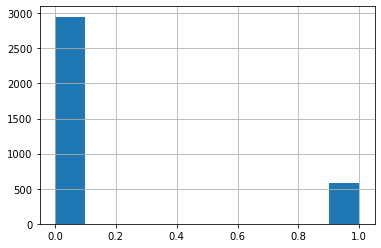

In [31]:
df_labels.hist()
plt.show()

Donc ce modèle n'est pas assez précis : erreur de 0.3

### DecisionTreeRegressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [33]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross-validation

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Résultats pour le DecisionTreeRegressor :

In [36]:
display_scores(tree_rmse_scores)

Scores: [0.2061381  0.18437553 0.16831106 0.19914833 0.18437553 0.24390589
 0.19914833 0.17652613 0.21320072 0.21320072]
Mean: 0.19883303198844401
Standard deviation: 0.020845178100222964


Résultats pour le LinearRegressor :

In [37]:
scores = cross_val_score(lin_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [0.34577014 0.34568652 0.32945159 0.32487066 0.33577665 0.36288736
 0.35299171 0.36465389 0.34703573 0.34878895]
Mean: 0.3457913204751552
Standard deviation: 0.012310228102557162


### RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [39]:
print(df_labels[10:20])
print("Predictions:", [round(prediction) for prediction in df_predictions[10:20]])

EmployeeID
1409    0.0
2234    1.0
1603    0.0
3327    0.0
4367    1.0
2100    0.0
755     1.0
1116    0.0
3854    1.0
1190    0.0
Name: Attrition, dtype: float64
Predictions: [0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


#### Score pour le RandomForestRegressor

In [40]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.16240055 0.15333867 0.15788977 0.15082399 0.15726054 0.20127075
 0.16456656 0.17796457 0.1935758  0.19857447]
Mean: 0.17176656625180495
Standard deviation: 0.018503918303816556


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec bootstrap à False (True étant la valeur par défaut)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=42)

In [44]:
forest_reg = grid_search.best_estimator_
forest_reg.fit(df_prepared, df_labels)

cvres_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.10056498 0.11489618 0.09491311 0.1011268  0.07876526 0.11972584
 0.06939643 0.15035369 0.12431631 0.13980506]
Mean: 0.10938636581641747
Standard deviation: 0.02419947261601633


### Perceptron

In [45]:
from sklearn.linear_model import Perceptron

percept_reg = Perceptron(random_state=42)
percept_reg.fit(df_prepared, df_labels)

Perceptron(random_state=42)

In [46]:
df_predictions = percept_reg.predict(df_prepared)
percept_mse = mean_squared_error(df_labels, df_predictions)
percept_rmse = np.sqrt(percept_mse)
percept_rmse

0.40230345830275716

In [47]:
cvres_scores = cross_val_score(percept_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.4484787  0.44211698 0.42911068 0.39472442 0.41909115 0.42579704
 0.4053467  0.38009988 0.44274454 0.39886202]
Mean: 0.4186372107267031
Standard deviation: 0.021928938107298856


### Conclusion

Le meilleur modèle est le **_RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10, random_state=42)_**

##               <center>  <br /> <br />  3. Classification </center> 

In [48]:
X = df_ethical.copy()
X.drop("Attrition", axis=1, inplace=True)

y = df_ethical["Attrition"].copy()

#### Constitution du jeu de test et du jeu d'entraînement

In [49]:
train_size = int(len(X)*0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(f"Train size: {train_size}\nTest size: {4410-train_size}")

Train size: 3528
Test size: 882


On mélange les données et les étiquettes pour le jeu d'entraînement

In [50]:
shuffle_index = np.random.permutation(train_size)
X_train, y_train = [X.iloc[index] for index in shuffle_index], [y.iloc[index] for index in shuffle_index]

### Classifieur binaire

In [51]:
y_train_1 = [y == 1 for y in y_train]
y_test_1 = [y == 1 for y in y_test]

In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

In [53]:
# is_attrition = False
# 
# while not is_attrition:
#     random_index = np.random.randint(len(X_train), size=1)[0]
#     some_data = X_test.iloc[random_index]
#     is_attrition = y.iloc[random_index] == 1

random_index = np.random.randint(len(X_train), size=1)[0]
some_data = X_train[random_index]
is_attrition = y.iloc[random_index] == 1

print(some_data)
print(f"\nAttrition for employee n°{random_index}:", y.iloc[random_index])

EnvironmentSatisfaction       1.000000
JobSatisfaction               1.000000
WorkLifeBalance               0.333333
Age                           0.452381
BusinessTravel                1.000000
Department                    1.000000
DistanceFromHome              0.000000
Education                     0.750000
EducationField                0.200000
EmployeeCount                 0.000000
JobLevel                      0.250000
JobRole                       0.000000
MonthlyIncome                 0.649763
NumCompaniesWorked            0.777778
PercentSalaryHike             0.214286
TotalWorkingYears             0.200000
YearsAtCompany                0.150000
YearsSinceLastPromotion       0.000000
YearsWithCurrManager          0.235294
JobInvolvement                0.666667
PerformanceRating             0.000000
AverageTimeWorkedInTheYear    0.062596
Name: 3023, dtype: float64

Attrition for employee n°1386: 0.0


In [54]:
sgd_clf.predict([some_data])

array([0.])

#### Cross-validation

In [55]:
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.84268707, 0.82738095, 0.84863946])

In [56]:
from sklearn.base import BaseEstimator
class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X))

In [57]:
never_1_clf = Never1Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.82823129, 0.83843537, 0.84268707])

#### Matrice de confusion

In [58]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[2876,   75],
       [ 491,   86]], dtype=int64)

Comparaison avec un classifieur parfait

In [60]:
y_train_perfect_predictions = y_train_1
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[2951,    0],
       [   0,  577]], dtype=int64)

### Random forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3)

In [62]:
confusion_matrix(y_train_1, y_probas_forest)

array([[2948,    3],
       [ 125,  452]], dtype=int64)

### DescisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_probas_dt = cross_val_predict(dt_clf, X_train, y_train_1, cv=3)

In [64]:
confusion_matrix(y_train_1, y_probas_dt)

array([[2812,  139],
       [ 113,  464]], dtype=int64)

### MLP Classifier

In [65]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)
y_probas_mlp = cross_val_predict(mlp_clf, X_train, y_train_1, cv=3)

_Remarque : plus long à exécuter que les autres (env. 15/20 secondes)_

In [66]:
confusion_matrix(y_train_1, y_probas_mlp)

array([[2863,   88],
       [ 327,  250]], dtype=int64)

### Evaluation des métriques

In [67]:
from sklearn.metrics import precision_score, recall_score
precision_score_sgd = precision_score(y_train_1, y_train_pred)
precision_score_forest = precision_score(y_train_1, y_probas_forest)
precision_score_dt = precision_score(y_train_1, y_probas_dt)
precision_score_mlp = precision_score(y_train_1, y_probas_mlp)

print(f"Precision score SGD: {precision_score_sgd}\nPrecision score Forest: {precision_score_forest}\nPrecision Decision Tree: {precision_score_dt}\nPrecision MLP: {precision_score_mlp}")

Precision score SGD: 0.5341614906832298
Precision score Forest: 0.9934065934065934
Precision Decision Tree: 0.7694859038142621
Precision MLP: 0.7396449704142012


In [68]:
recall_score_sgd = recall_score(y_train_1, y_train_pred)
recall_score_forest = recall_score(y_train_1, y_probas_forest)
recall_score_dt = recall_score(y_train_1, y_probas_dt)
recall_score_mlp = recall_score(y_train_1, y_probas_mlp)

print(f"Recall score SGD: {recall_score_sgd}\nRecall score Forest: {recall_score_forest}\nRecall score Decision tree: {recall_score_dt}\nRecall score MLP: {recall_score_mlp}")

Recall score SGD: 0.14904679376083188
Recall score Forest: 0.7833622183708839
Recall score Decision tree: 0.804159445407279
Recall score MLP: 0.43327556325823224


In [69]:
from sklearn.metrics import f1_score
f1_score_sgd = f1_score(y_train_1, y_train_pred)
f1_score_forest = f1_score(y_train_1, y_probas_forest)
f1_score_dt = f1_score(y_train_1, y_probas_dt)
f1_score_mlp = f1_score(y_train_1, y_probas_mlp)

print(f"F1 SGD: {f1_score_sgd}\nF1 Forest: {f1_score_forest}\nF1 Decision tree: {f1_score_dt}\nF1 MLP: {f1_score_mlp}")

F1 SGD: 0.23306233062330625
F1 Forest: 0.8759689922480621
F1 Decision tree: 0.7864406779661018
F1 MLP: 0.546448087431694


### Courbe ROC

In [70]:
from sklearn.metrics import roc_curve

y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3,
                             method="decision_function")
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

y_probas_dt = cross_val_predict(dt_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_dt = y_probas_dt[:, 1]

y_probas_mlp = cross_val_predict(mlp_clf, X_train, y_train_1, cv=3,
                             method="predict_proba")
y_scores_mlp = y_probas_mlp[:, 1]

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_1, y_scores_sgd)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train_1, y_scores_dt)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_train_1, y_scores_mlp)

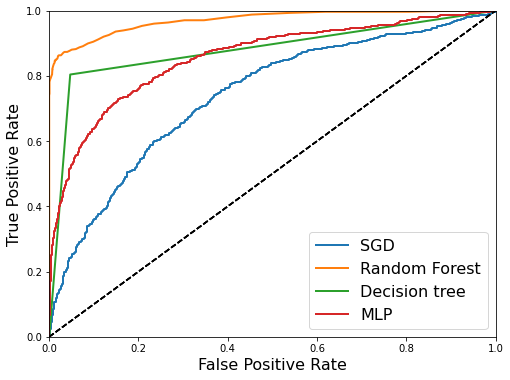

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_dt, tpr_dt, "Decision tree")
plot_roc_curve(fpr_mlp, tpr_mlp, "MLP")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [72]:
from sklearn.metrics import auc

auc_sgd = auc(fpr_sgd, tpr_sgd)
auc_forest = auc(fpr_forest, tpr_forest)
auc_dt = auc(fpr_dt, tpr_dt)
auc_mlp = auc(fpr_mlp, tpr_mlp)

print(f"AUC SGD: {auc_sgd}\nAUC Forest: {auc_forest}\nAUC Decision tree: {auc_dt}\nAUC MLP: {auc_mlp}")

AUC SGD: 0.7390691520132118
AUC Forest: 0.9708790663447519
AUC Decision tree: 0.8785283841743273
AUC MLP: 0.8569018991300426


### Conclusion

Le modèle de RandomForestClassifier semble être le plus performant pour notre jeu de données.

## Test avec le jeu de test

In [73]:
def classifierStats(clf, nb_tests):
    successes = 0
    fails = 0
    for i in range(nb_tests):
        random_index = np.random.randint(len(X_test), size=1)[0]
        some_data = X_test.iloc[random_index]
        is_attrition = y.iloc[random_index] == 1
        
        success = True if clf.predict([some_data])[0] == y.iloc[random_index] else False
        if success:
            successes += 1
        else:
            fails += 1
    
    mean_of_successes = successes/(successes+fails)
    return successes, mean_of_successes

In [74]:
classifierStats(forest_clf, 50)

(36, 0.72)

#### Visualisation de la performance de notre modèle de classification

In [75]:
import matplotlib.pylab as plt

def plotDict(dict, x_max, y_max, y_label="", label=""):
    lists = sorted(dict.items())

    x, y = zip(*lists)
    
    plt.plot(x, y, linewidth=2, label=label)
    plt.axis([1, x_max, 0, y_max])
    plt.xlabel('Number of tests', fontsize=16)
    plt.ylabel(y_label, fontsize=16)

def plotClassifierStats(clfs, number_of_execution=10, number_of_tries_per_execution=50):    
    stats = dict()
    
    for classifier in clfs:
        no_of_successes_per_execution = dict()
        mean_of_successes_per_execution = dict()

        for i in range(number_of_execution):
            result = classifierStats(classifier, number_of_tries_per_execution)
            no_of_successes_per_execution[i+1] = result[0]
            mean_of_successes_per_execution[i+1] = result[1]

        model_name = str(type(classifier)).split('.')[-1].replace("\'>", '')
        
        stats[model_name] = [no_of_successes_per_execution, mean_of_successes_per_execution]
    
    plt.figure(figsize=(8, 6))
    for key in stats.keys():    
        plotDict(stats[key][0], x_max=number_of_execution, y_max=number_of_tries_per_execution,
                 y_label="Number of successes per test", label=key)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()
    
    for key in stats.keys(): 
        plotDict(stats[key][1], x_max=number_of_execution, y_max=1,
                 y_label="Mean of successes per test", label=key)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

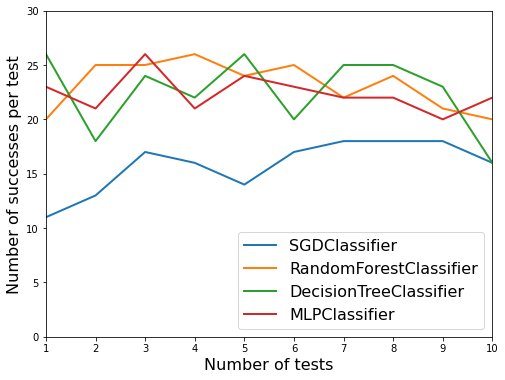

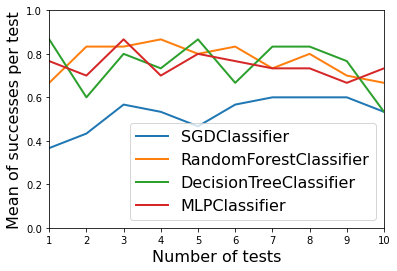

In [76]:
classifiers = [
    sgd_clf,
    forest_clf,
    dt_clf,
    mlp_clf
]

plotClassifierStats(
    classifiers,
    number_of_execution=10,
    number_of_tries_per_execution=30
)

On observe que les différents classifieurs ont une moyenne de réussite de prédiction autour de 75%.

## <center>  <br /> <br /> VI. RESSOURCES </center>  

## <center>  <br /> <br /> VIII. LEXIQUE </center>  